In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [2]:
class robot:
    def __init__(self, world_size=100.0, meadurement_range = 30.0, motion_noise = 1.0, measurement_noise = 1.0):
        self.world_size = world_size
        self.measurement_range = measurement_range
        self.x                 = world_size / 2.0
        self.y                 = world_size / 2.0
        self.motion_noise      = motion_noise
        self.measurement_noise = measurement_noise
        self.landmarks         = []
        self.num_landmarks     = 0
        
    def rand(self):
        return random.random() * 2.0 - 1.0
    
    def move(self, dx, dy):
        x = self.x + dx + self.rand() * motion_noise
        y = self.y + dy + self.rand() * motion_noise
        if x < 0.0 or x > world_size or y < 0.0 or y > world_size:
            return False
        else:
            self.x = x
            self.y = y
            return True
        
        
    def sense(self):
        measurements = []
        for i, landmark in enumerate(self.landmarks):
            dx  = landmark[0] - self.x + self.rand() * self.measurement_noise
            dy  = landmark[1] - self.y + self.rand() * self.measurement_noise
            if abs(dx) <= self.measurement_range and abs(dy) <= self.measurement_range:
                measurements.append([i,dx,dy])
        return measurements
    
    def make_landmarks(self, num_landmarks):
        self.landmarks = []
        for i in range(num_landmarks):
            self.landmarks.append([round(random.random() * self.world_size),
                                  round(random.random() * self.world_size)])
            self.num_landmarks = num_landmarks
    def __repr__(self):
        return 'Robot: [x=%.5f y=%.5f]'  % (self.x, self.y)

In [3]:
world_size        = 10.0
measurement_range = 5.0
measurement_noise = 0.2
motion_noise     = 0.2

r = robot(world_size,measurement_range,measurement_noise, motion_noise)
print(r)

Robot: [x=5.00000 y=5.00000]


Robot: [x=5.00000 y=5.00000]


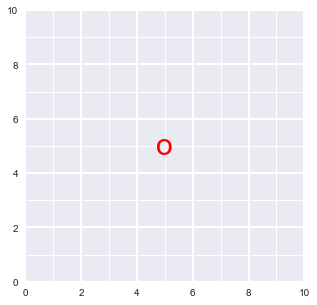

In [4]:
from helpers import display_world

plt.rcParams['figure.figsize'] = (5,5)
print(r)
display_world(int(world_size), [r.x,r.y])

Robot: [x=5.82661 y=6.82226]


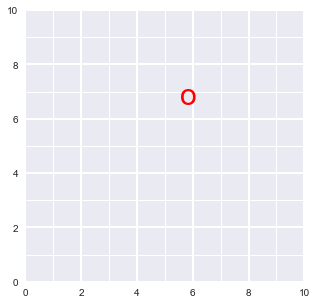

In [5]:
dx = 1
dy = 2
r.move(dx,dy)
print(r)
display_world(int(world_size),[r.x,r.y])

Robot: [x=5.82661 y=6.82226]


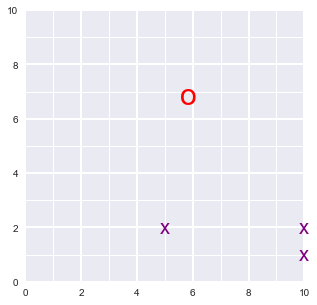

Landmark locations [x,y]:  [[5, 2], [10, 1], [10, 2]]


In [6]:
num_landmarks = 3
r.make_landmarks(num_landmarks)

# print out our robot's exact location
print(r)

# display the world including these landmarks
display_world(int(world_size), [r.x, r.y], r.landmarks)

# print the locations of the landmarks
print('Landmark locations [x,y]: ', r.landmarks)

In [7]:
measurements = r.sense()
print(measurements)

[[0, -0.9622828598488274, -4.842698524768464], [2, 4.141411359133446, -4.842070696323587]]


In [8]:
data = []
data.append([measurements, [dx, dy]])

print(data)

[[[[0, -0.9622828598488274, -4.842698524768464], [2, 4.141411359133446, -4.842070696323587]], [1, 2]]]


In [9]:

time_step = 0

print('Measurements: ', data[time_step][0])

print('Motion: ', data[time_step][1])

Measurements:  [[0, -0.9622828598488274, -4.842698524768464], [2, 4.141411359133446, -4.842070696323587]]
Motion:  [1, 2]
